In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

$$
\vec x_{n+1} = \vec x_{n} + \delta \vec g \left( \vec x_n + \frac{\delta}{2} g(x_x,t_n) , t_n + \frac{\delta}{2} \right) 
$$

In [14]:
def pendulo_cff(x , t , args=[0,0,0]):
    # x = (theta, v_theta)
    # args = Amplitud , omega_1 , gamma
    return np.array([ x[1] , -np.sin(x[0]) - args[2]*x[1] + args[0]*np.cos(args[1]*t)])

def RK2(g,x0,t,args=None):
    h , sol = t[1]-t[0] , np.zeros( (len(x0),len(t)) )
    sol[:,0] = x0 #condicion inicial
    for i in range(len(t)-1):
        sol[:,i+1] += sol[:,i]
        x_intermedio = sol[:,i] + 0.5*h*g(sol[:,i],t[i] , args)
        sol[:,i+1] += h*g( x_intermedio , t[i]+0.5*h , args)
    return sol

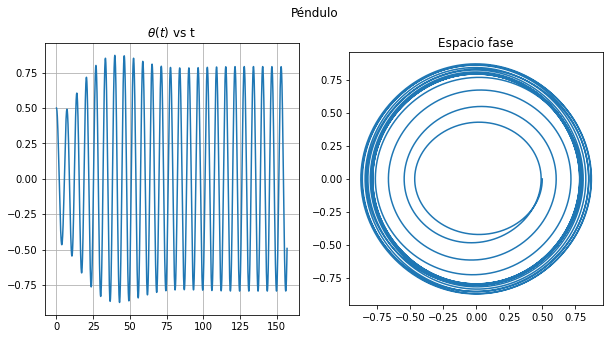

In [23]:
t = np.arange(0,50*np.pi,0.01)
sol = RK2(pendulo_cff,[0.5,0],t,args=[0.1,1,0.1])
figura , (graf1,graf2) = plt.subplots(1,2,figsize=(10,5))
figura.suptitle('Péndulo')
graf1.set_title(r'$\theta (t)$ vs t')
graf1.plot(t,sol[0,:])
graf1.grid()
graf2.set_title('Espacio fase')
graf2.plot(sol[0,:],sol[1,:])
graf2.set_aspect('equal')

$$
\vec x_{n+1} = \vec x_{n} + \frac{\delta}{6}(k_1 + 2k_2 +2k_3 +k_4)
$$

$$
k_1 =  \vec g \left( \vec x_n , t_n  \right) \\
k_2 =  \vec g \left( \vec x_n + \frac{\delta}{2} k_1 , t_n + \frac{\delta}{2} \right) \\
k_3 =  \vec g \left( \vec x_n + \frac{\delta}{2} k_2 , t_n + \frac{\delta}{2} \right) \\
k_4 =  \vec g \left( \vec x_n +  \delta k_3 , t_n + \delta \right) \\
$$

In [17]:
def RK4(g,x0,t,args=None):
    h , sol = t[1]-t[0] , np.zeros( (len(x0),len(t)) )
    sol[:,0] = x0 #condicion inicial
    for i in range(len(t)-1):
        k1 = g(sol[:,i],t[i] , args)
        k2 = g(sol[:,i] + 0.5*h*k1 , t[i]+0.5*h , args)
        k3 = g(sol[:,i] + 0.5*h*k2 , t[i]+0.5*h , args)
        k4 = g(sol[:,i] + h*k3 , t[i]+h , args)
        sol[:,i+1] += sol[:,i] + (k1 + 2*k2 + 2*k3 + k4)*(h/6)
    return sol

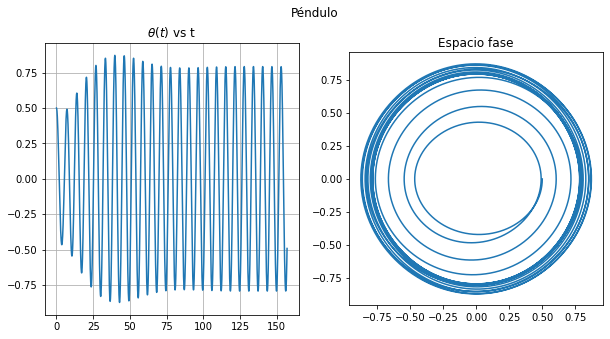

In [24]:
t = np.arange(0,50*np.pi,0.01)
sol = RK4(pendulo_cff,[0.5,0],t,args=[0.1,1,0.1])
figura , (graf1,graf2) = plt.subplots(1,2,figsize=(10,5))
figura.suptitle('Péndulo')
graf1.set_title(r'$\theta (t)$ vs t')
graf1.plot(t,sol[0,:])
graf1.grid()
graf2.set_title('Espacio fase')
graf2.plot(sol[0,:],sol[1,:])
graf2.set_aspect('equal')

(None, None)

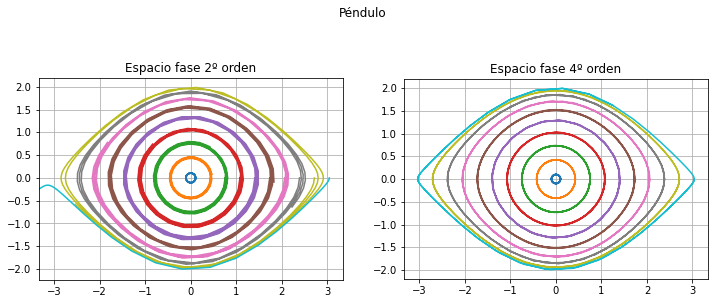

In [101]:
t = np.arange(0,10*np.pi,0.3)
figura , (graf1,graf2) = plt.subplots(1,2,figsize=(12,5))
figura.suptitle('Péndulo')
graf1.set_title(r'Espacio fase 2º orden')
ci = np.linspace(0.1,np.pi-0.1,10)
for ci_i in ci:
    sol_k2 = RK2(pendulo_cff,[ci_i,0],t,args=[0.0,0.0,0.0])
    sol_k4 = RK4(pendulo_cff,[ci_i,0],t,args=[0.0,0.0,0.0])
    graf1.plot(sol_k2[0,:],sol_k2[1,:])
    graf2.plot(sol_k4[0,:],sol_k4[1,:])

graf2.set_title('Espacio fase 4º orden')
graf1.set_xlim([-np.pi-0.2,np.pi+0.2])
graf1.grid(),graf2.grid()
graf1.set_aspect('equal'),graf2.set_aspect('equal')

In [56]:
t = np.arange(0,10*np.pi,0.1)

In [45]:
%%timeit
sol_k2 = RK2(pendulo_cff,[0.5,0],t,args=[0.0,0.0,0.0])

1.03 ms ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [46]:
%%timeit
sol_k4 = RK4(pendulo_cff,[0.5,0],t,args=[0.0,0.0,0.0])

2.18 ms ± 7.15 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


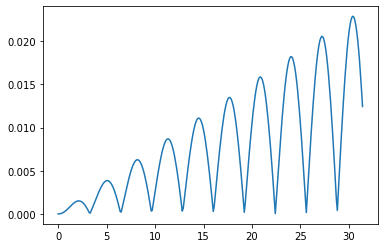

In [57]:
sol_k2 = RK2(pendulo_cff,[0.5,0],t,args=[0.0,0.0,0.0])
sol_k4 = RK4(pendulo_cff,[0.5,0],t,args=[0.0,0.0,0.0])
error_rel = abs(sol_k2[0,:]-sol_k4[0,:])
plt.plot(t,error_rel)
plt.show()

In [58]:
import scipy.integrate as spi

In [61]:
def pendulo_cff2( t , x , args=[0,0,0]):
    # x = (theta, v_theta)
    # args = Amplitud , omega_1 , gamma
    return np.array([ x[1] , -np.sin(x[0]) - args[2]*x[1] + args[0]*np.cos(args[1]*t)])

In [78]:
t = np.arange(0,10*np.pi,0.1)
sol=spi.solve_ivp(pendulo_cff2,(0,10*np.pi),[0.5,0],t_eval=t)

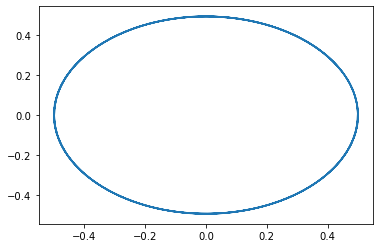

In [79]:
plt.plot(sol.y[0],sol.y[1])
plt.show()

In [83]:
sol=spi.solve_ivp(pendulo_cff2,(0,10*np.pi),[0.5,0],dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 212
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x168f80160>
   status: 0
  success: True
        t: array([0.00000000e+00, 2.08166631e-03, 2.28983294e-02, 2.31064960e-01,
       1.01928426e+00, 2.02529286e+00, 2.96231414e+00, 3.98980479e+00,
       4.96775953e+00, 5.96090505e+00, 6.95870037e+00, 7.90535483e+00,
       8.92743736e+00, 9.89417112e+00, 1.08783086e+01, 1.19024064e+01,
       1.28436898e+01, 1.38738324e+01, 1.48848600e+01, 1.58011859e+01,
       1.68370003e+01, 1.78254037e+01, 1.87990662e+01, 1.98093384e+01,
       2.07699793e+01, 2.17834066e+01, 2.27629366e+01, 2.37144107e+01,
       2.47403505e+01, 2.56908542e+01, 2.67083592e+01, 2.77253792e+01,
       2.86520293e+01, 2.96899207e+01, 3.06884596e+01, 3.14159265e+01])
 t_events: None
        y: array([[ 0.5       ,  0.49999896,  0.49987432,  0.48725145,  0.26970788,
        -0.20630484, -

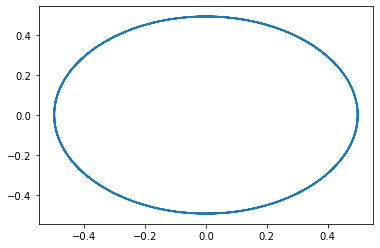

In [89]:
t = np.linspace(0,10*np.pi,200)
th_vth = sol.sol(t)
plt.plot(th_vth[0],th_vth[1])
plt.show()

In [90]:
sol=spi.solve_ivp(pendulo_cff2,(0,10*np.pi),[0.5,0],rtol=1e-8,atol=1e-8,dense_output=True)
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1520
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x16913d1f0>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.24153443e-02, 1.35112123e-01, 2.59130204e-01,
       3.84498918e-01, 5.11248082e-01, 6.39259110e-01, 7.68176469e-01,
       8.97342686e-01, 1.02585688e+00, 1.15280942e+00, 1.27755991e+00,
       1.39985755e+00, 1.51977929e+00, 1.63760163e+00, 1.75369497e+00,
       1.87068176e+00, 1.98933388e+00, 2.11000377e+00, 2.23295434e+00,
       2.35827097e+00, 2.48574252e+00, 2.61477098e+00, 2.74443150e+00,
       2.87373276e+00, 3.00190956e+00, 3.12853846e+00, 3.25347745e+00,
       3.37675429e+00, 3.50131121e+00, 3.62724397e+00, 3.75453159e+00,
       3.88297027e+00, 4.01208517e+00, 4.14110239e+00, 4.26908163e+00,
       4.39519474e+00, 4.51895733e+00, 4.64026590e+00, 4.75929383e+00,
       4.87636603e+00, 4.99255182e+00, 5.11017112e+

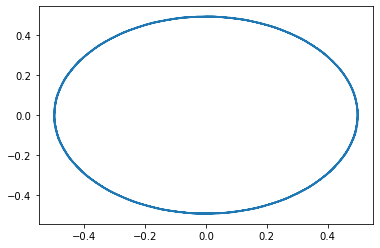

In [94]:
t = np.linspace(0,10*np.pi,150)
th_vth = sol.sol(t)
plt.plot(th_vth[0],th_vth[1])
plt.show()

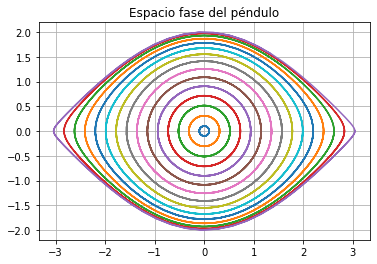

In [102]:
t = np.linspace(0,10*np.pi,200)
ci = np.linspace(0.1,np.pi-0.1,15)
for ci_i in ci:
    sol_ivp = spi.solve_ivp(pendulo_cff2,(0,10*np.pi),[ci_i,0],rtol=1e-8,atol=1e-8,dense_output=True)
    th_vth = sol_ivp.sol(t)
    plt.plot(th_vth[0],th_vth[1])

plt.title('Espacio fase del péndulo')
plt.grid()
plt.gca().set_aspect('equal')
plt.show()